<a href="https://colab.research.google.com/github/ArshockAbedan/scikit-learn/blob/main/VectorQuantizationExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np 
import scipy as np
import matplotlib.pyplot as plt

from sklearn import cluster

In [32]:
try:
  from scipy.misc import face
  face = face(gray=False)
except ImportError:
  face = sp.face(gray=False)

In [33]:
n_clusters = 5
# np.random.seed(0)

In [34]:
X = face.reshape((-1,1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=10)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

In [45]:
# create an array from Labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.choose is deprecated and will be removed in SciPy 2.0.0, use numpy.choose instead
  


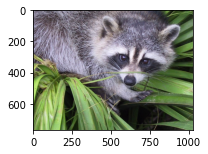

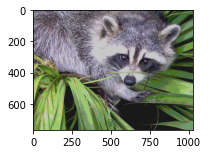

In [50]:
# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, vmin=vmin, vmax=256)

# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, vmin=0, vmax=256)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.searchsorted is deprecated and will be removed in SciPy 2.0.0, use numpy.searchsorted instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.choose is deprecated and will be removed in SciPy 2.0.0, use numpy.choose instead
  """


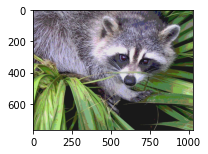

In [53]:
# equal bins face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = 0.5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
regular_face = regular_face.astype(int)
plt.figure(3, figsize=(3, 2.2))
plt.imshow(regular_face, vmin=0, vmax=256)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.sort is deprecated and will be removed in SciPy 2.0.0, use numpy.sort instead
  


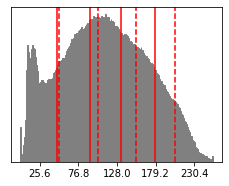

In [54]:
# histogram
plt.figure(4, figsize=(3, 2.2))
plt.clf()
plt.axes([0.01, 0.01, 0.98, 0.98])
plt.hist(X, bins=256, color=".5", edgecolor=".5")
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(0.5 * (center_1 + center_2), color="r")

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(0.5 * (center_1 + center_2), color="r", linestyle="--")

plt.show()